In [16]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

In [17]:
exp_type = 'exp_align1'
decoding_file = os.path.join(os.getcwd(),os.pardir,'results',exp_type,'decoding.csv')
decoding_data = pd.read_csv(decoding_file)


In [18]:
print(decoding_data.head())
print('len',len(decoding_data))

     pos_GOP    pos_NET  phi1_GOP  phi1_NET  phi2_GOP  phi2_NET  phi3_GOP   
0  98.389318  98.526535  4.951591  5.081124  0.517705  0.573617  5.237345  \
1  98.424471  98.353590  5.094371  5.212900  0.376503  0.407996  5.305950   
2  98.432408  98.120125  5.002035  5.026231  0.282217  0.312419  5.351586   
3  98.365919  98.410030  4.728729  4.822266  0.499452  0.506805  5.203174   
4  98.475423  98.574030  5.144954  5.297547  0.427268  0.439313  5.378362   

   phi3_NET  
0  5.260648  
1  5.328327  
2  5.360983  
3  5.219160  
4  5.416172  
len 400


In [19]:
def generate_stim_array(L=400, k=20, a=98.5):
    # Create an array of length L filled with zeros
    arr = np.zeros(L)
    # Fill the array according to the specified pattern
    for i in range(0, L, k):
        arr[i:i+k] = a + (i // k) * 0.25
    return arr

arr = generate_stim_array()
mean_gt = np.mean(arr)
print('mean_gt',mean_gt)

mean_gt 100.875


In [20]:
pos_GOP = decoding_data['pos_GOP'] - mean_gt
pos_NET = decoding_data['pos_NET'] - mean_gt

In [21]:
save_path = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_path):
    os.makedirs(save_path)

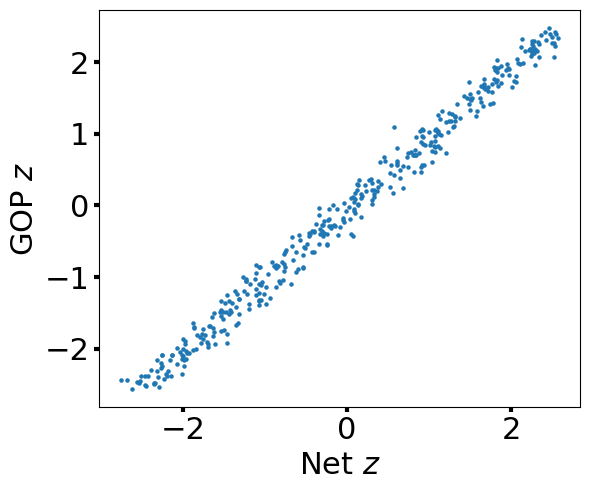

In [22]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12
scatter_size = 5
plt.figure(figsize=(6, 5))
plt.scatter(pos_NET, pos_GOP, s=scatter_size)
# min_value = min(np.min(pos_NET), np.min(pos_GOP)) - 0.1
# max_value = max(np.max(pos_NET), np.max(pos_GOP)) + 0.1
# plt.plot([min_value, max_value], [min_value, max_value], 'k--', linewidth=linewidth)
plt.xlabel('Net $z$', fontsize=fontsize)
plt.ylabel('GOP $z$', fontsize=fontsize)
plt.gca().tick_params(width=linewidth)
plt.gca().tick_params(labelsize=fontsize)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'align_z.png'))
plt.show()

In [23]:
# calculate the correlation between the two z values
corr = np.corrcoef(pos_NET, pos_GOP)[0, 1]
print('the correlation between the two z values is:', corr)
# calculate the pearson correlation between the two z values
from scipy.stats import pearsonr
corr, _ = pearsonr(pos_NET, pos_GOP)
print('the pearson correlation between the two z values is:', corr)

the correlation between the two z values is: 0.9939501444457979
the pearson correlation between the two z values is: 0.9939501444457983


In [24]:
phi1_GOP = decoding_data['phi1_GOP']
phi2_GOP = decoding_data['phi2_GOP']
phi3_GOP = decoding_data['phi3_GOP']
phi1_NET = decoding_data['phi1_NET']
phi2_NET = decoding_data['phi2_NET']
phi3_NET = decoding_data['phi3_NET']

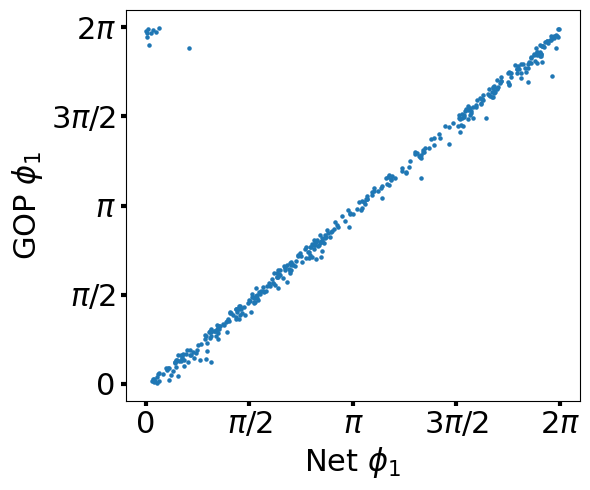

In [25]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12
plt.figure(figsize=(6, 5))
plt.scatter(phi1_NET, phi1_GOP, s=scatter_size)
# min_value = min(np.min(phi1_NET), np.min(phi1_GOP)) - 0.1
# max_value = max(np.max(phi1_NET), np.max(phi1_GOP)) + 0.1
# plt.plot([min_value, max_value], [min_value, max_value], 'k--', linewidth=linewidth)
plt.xlabel('Net $\phi_1$', fontsize=fontsize)
plt.ylabel('GOP $\phi_1$', fontsize=fontsize)
plt.gca().tick_params(width=linewidth)
plt.gca().tick_params(labelsize=fontsize)
# x ticks [0, pi/2, pi, 3pi/2, 2pi]
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'align_phi1.png'))
plt.show()

In [26]:
# calculate the correlation between the two phi1 values
import numpy as np
from scipy.stats import circmean, circvar

def circular_correlation(alpha, beta):
    n = len(alpha)
    alpha_bar = circmean(alpha)
    beta_bar = circmean(beta)
    
    sin_alpha_diff = np.sin(alpha - alpha_bar)
    sin_beta_diff = np.sin(beta - beta_bar)
    
    numerator = np.sum(sin_alpha_diff * sin_beta_diff)
    denominator = np.sqrt(np.sum(sin_alpha_diff**2) * np.sum(sin_beta_diff**2))
    
    return numerator / denominator

corr_phi1 = circular_correlation(phi1_NET, phi1_GOP)
print('the circular correlation between the two phi1 values is:', corr_phi1)

the circular correlation between the two phi1 values is: 0.9944401660952102


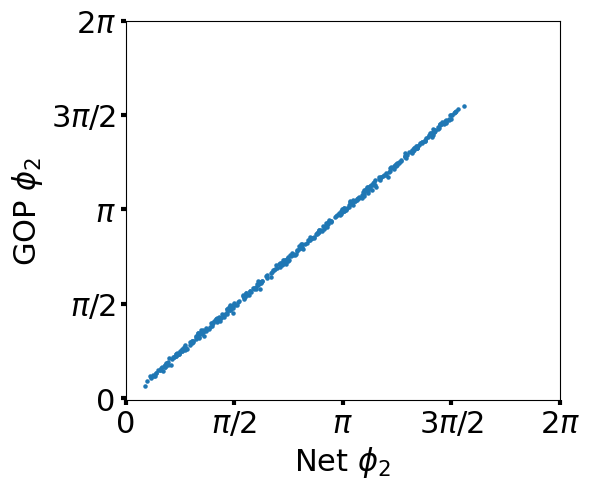

In [27]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12
plt.figure(figsize=(6, 5))
plt.scatter(phi2_NET, phi2_GOP, s=scatter_size)
# min_value = min(np.min(phi2_NET), np.min(phi2_GOP)) - 0.1
# max_value = max(np.max(phi2_NET), np.max(phi2_GOP)) + 0.1
# plt.plot([min_value, max_value], [min_value, max_value], 'k--', linewidth=linewidth)
plt.xlabel('Net $\phi_2$', fontsize=fontsize)
plt.ylabel('GOP $\phi_2$', fontsize=fontsize)
plt.gca().tick_params(width=linewidth)
plt.gca().tick_params(labelsize=fontsize)
# x ticks [0, pi/2, pi, 3pi/2, 2pi]
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'align_phi2.png'))
plt.show()

In [28]:
# calculate the correlation between the two phi2 values
corr_phi2 = circular_correlation(phi2_NET, phi2_GOP)
print('the circular correlation between the two phi2 values is:', corr_phi2)

the circular correlation between the two phi2 values is: 0.9997529975167585


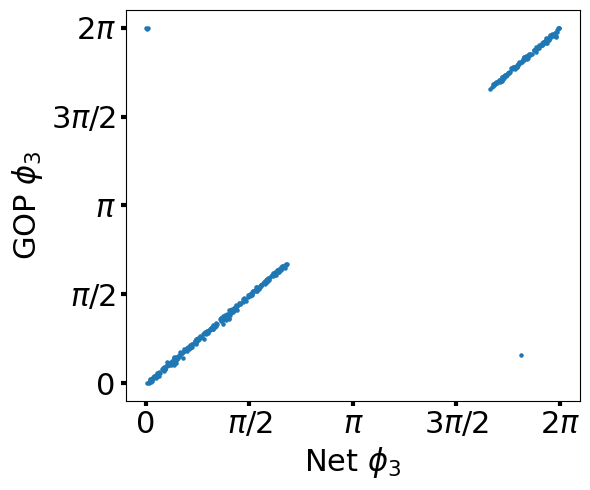

In [29]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12
plt.figure(figsize=(6, 5))
plt.scatter(phi3_NET, phi3_GOP, s=scatter_size)
plt.xlabel('Net $\phi_3$', fontsize=fontsize)
plt.ylabel('GOP $\phi_3$', fontsize=fontsize)
plt.gca().tick_params(width=linewidth)
plt.gca().tick_params(labelsize=fontsize)
# x ticks [0, pi/2, pi, 3pi/2, 2pi]
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'align_phi3.png'))
plt.show()

In [30]:
# calculate the correlation between the two phi2 values
corr_phi2 = circular_correlation(phi2_NET, phi2_GOP)
print('the circular correlation between the two phi2 values is:', corr_phi2)

the circular correlation between the two phi2 values is: 0.9997529975167585
